In [225]:
import numpy as np
import pandas as pd
import re,math
from sklearn import preprocessing
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
#from bokeh.plotting import figure, show, output_file


#已有的35细胞系
data = pd.read_csv(r'35_CCLE4000.csv')

In [226]:
data.head()

,Name,MT.CO2,MT.CO1,MT.RNR2,FTL,EEF1A1P5,RPS18,TMSB10,FN1,MT.ND2,...,G3BP1,FAS,MIA,TNFRSF1B,PIK3CD,RAVER1,NEUROD6,IGHV2.26,RP11.254B13.1,MYRF
0,A2058,138.664175,99.733470,29.362917,33.507670,28.580983,32.005938,10.723401,4.332792,46.013772,...,0.622143,-0.016467,0.225654,-0.087723,0.010787,0.076835,-0.093931,-0.092728,0.178902,0.060812
1,A2780,132.079201,114.522279,43.443616,7.071069,41.351143,20.272538,3.218207,-0.070932,47.875397,...,0.383265,-0.039013,-0.078075,-0.077774,-0.044276,0.350657,-0.078075,-0.078075,0.128915,-0.067700
2,A375,88.664555,82.985653,17.684115,15.773244,54.772199,30.988268,19.931180,0.679905,34.807456,...,0.712732,-0.026034,1.234437,-0.080171,-0.032848,0.775303,-0.118437,-0.118437,0.332271,-0.083249
3,A427,129.025616,89.746054,13.120489,11.230936,23.942771,11.706606,29.606541,-0.044986,88.208783,...,0.173741,0.025657,-0.061178,-0.061313,-0.031394,0.105856,-0.061409,-0.061201,0.096060,-0.026113
4,CAOV3,122.213951,116.564153,43.291175,26.778444,35.949574,17.530583,22.951898,1.567967,53.569745,...,0.493755,0.062419,-0.074416,-0.059800,-0.042722,0.163952,-0.077403,-0.076815,0.117359,-0.055078


In [227]:
name_index = [] 
for i in data['Name']:
    name_index.append(str(i).strip())
#已有35细胞系名称
name_index

['A2058',
 'A2780',
 'A375',
 'A427',
 'CAOV3',
 'COLO320',
 'EFM192A',
 'ES2',
 'HCT116',
 'HT144',
 'HT29',
 'KPL1',
 'LOVO',
 'MDAMB436',
 'MSTO211H',
 'NCIH1650',
 'NCIH2122',
 'NCIH23',
 'NCIH460',
 'NCIH520',
 'OV90',
 'OVCAR4',
 'RKO',
 'RPMI7951',
 'SKMEL30',
 'SKMES1',
 'SKOV3',
 'SW620',
 'SW837',
 'T47D',
 'UACC62',
 'VCAP',
 'ZR751',
 'DLD1',
 'PA1']

In [228]:
#原始数据
origin = pd.read_csv(r'CCLE_EXP(name).csv')
origin

,Name,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,647V_URINARY_TRACT,...,UMUC16_URINARY_TRACT,UMUC4_URINARY_TRACT,UMUC5_URINARY_TRACT,UMUC6_URINARY_TRACT,UMUC7_URINARY_TRACT,UMUC9_URINARY_TRACT,UPCISCC152_UPPER_AERODIGESTIVE_TRACT,UW228_CENTRAL_NERVOUS_SYSTEM,Y79_AUTONOMIC_GANGLIA,YAMATO_SOFT_TISSUE
0,DDX11L1,0.00000,0.03755,0.00000,0.06507,0.00000,0.01378,0.01463,0.03085,0.00000,...,0.00000,0.02977,0.02999,0.03532,0.03831,0.03236,0.00000,0.03799,0.02907,0.00000
1,WASH7P,12.63011,10.14155,6.20657,6.55835,7.61752,6.19356,4.62277,6.00767,4.70699,...,6.42321,8.17443,7.75149,9.97036,8.17080,8.70551,15.23348,6.47732,8.45568,11.81688
2,MIR1302-11,0.04289,0.01037,0.16955,0.23364,0.08765,0.00000,0.00808,0.09373,0.02568,...,0.12367,0.19183,0.10492,0.18537,0.07408,0.07747,0.07448,0.01049,0.39607,0.17586
3,FAM138A,0.00000,0.00869,0.22423,0.16558,0.00000,0.00637,0.00000,0.01427,0.00000,...,0.01554,0.00459,0.01850,0.04903,0.01330,0.00000,0.02674,0.00879,0.26449,0.02266
4,OR4G4P,0.00000,0.00000,0.02886,0.03875,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00667,0.01182,0.01786,0.01052,0.01141,0.00642,0.00000,0.00000,0.00000,0.01459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56313,MT-ND5,2393.80298,1960.96802,1896.28870,3522.37695,1178.93579,1345.42151,1943.89148,1413.57471,956.31226,...,1994.84985,704.86267,3936.23853,3560.20459,1245.38379,1452.41895,793.58710,757.41357,1218.16992,1320.84558
56314,MT-ND6,1825.52332,2056.64697,2184.88647,4568.00195,1616.96484,1189.86279,1906.90405,1469.75574,1151.82861,...,1260.28455,398.13406,2419.38281,1791.45386,823.17352,996.53717,593.61139,472.01627,729.65912,564.16779
56315,MT-TE,0.25386,0.00000,0.26410,0.00000,0.12970,0.00000,0.00000,0.25217,0.00000,...,1.28093,0.40550,1.22567,1.58799,1.40931,0.08817,0.31489,0.15526,0.55439,0.00000
56316,MT-CYB,4923.78223,3827.00537,1905.18481,4590.01416,2343.92407,1902.01685,2026.15710,1603.98230,2752.73779,...,1585.35229,2027.31738,8521.06738,10211.49121,1641.64551,3437.12769,1645.22168,973.56439,1221.39954,1755.82764


In [229]:
c_list = []
for i in origin.columns:
    c_list.append(str(i))
#原始数据细胞系名称合集
c_list

['Name',
 '22RV1_PROSTATE ',
 '2313287_STOMACH ',
 '253JBV_URINARY_TRACT ',
 '253J_URINARY_TRACT ',
 '42MGBA_CENTRAL_NERVOUS_SYSTEM ',
 '5637_URINARY_TRACT ',
 '59M_OVARY ',
 '639V_URINARY_TRACT ',
 '647V_URINARY_TRACT ',
 '697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE ',
 '769P_KIDNEY ',
 '786O_KIDNEY ',
 '8305C_THYROID ',
 '8505C_THYROID ',
 '8MGBA_CENTRAL_NERVOUS_SYSTEM ',
 'A101D_SKIN ',
 'A1207_CENTRAL_NERVOUS_SYSTEM ',
 'A172_CENTRAL_NERVOUS_SYSTEM ',
 'A204_SOFT_TISSUE ',
 'A2058_SKIN ',
 'A253_SALIVARY_GLAND ',
 'A2780_OVARY ',
 'A375_SKIN ',
 'A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE ',
 'A427_LUNG ',
 'A498_KIDNEY ',
 'A4FUK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE ',
 'A549_LUNG ',
 'A673_BONE ',
 'A704_KIDNEY ',
 'ABC1_LUNG ',
 'ACCMESO1_PLEURA ',
 'ACHN_KIDNEY ',
 'AGS_STOMACH ',
 'ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE ',
 'AM38_CENTRAL_NERVOUS_SYSTEM ',
 'AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE ',
 'AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE ',
 'AN3CA_ENDOMETRIUM ',
 'ASPC1_PANCRE

In [230]:
#name = re.findall()
real_names = []
for i in name_index:
    text = i + '.*? '
    cout = 0
    for j in c_list:
        temp_list = re.findall(text, j, re.S)
        if len(temp_list) != 0:
            if (c_list[cout] != 'NCIH2342_LUNG ') & (c_list[cout] != 'NCIH2347_LUNG '):
                real_names.append(c_list[cout])
                break
        cout +=1
#补全后的35细胞系名称
real_names

['A2058_SKIN ',
 'A2780_OVARY ',
 'A375_SKIN ',
 'A427_LUNG ',
 'CAOV3_OVARY ',
 'COLO320_LARGE_INTESTINE ',
 'EFM192A_BREAST ',
 'ES2_OVARY ',
 'HCT116_LARGE_INTESTINE ',
 'HT144_SKIN ',
 'HT29_LARGE_INTESTINE ',
 'KPL1_BREAST ',
 'LOVO_LARGE_INTESTINE ',
 'MDAMB436_BREAST ',
 'MSTO211H_PLEURA ',
 'NCIH1650_LUNG ',
 'NCIH2122_LUNG ',
 'NCIH23_LUNG ',
 'NCIH460_LUNG ',
 'NCIH520_LUNG ',
 'OV90_OVARY ',
 'OVCAR4_OVARY ',
 'RKO_LARGE_INTESTINE ',
 'RPMI7951_SKIN ',
 'SKMEL30_SKIN ',
 'SKMES1_LUNG ',
 'SKOV3_OVARY ',
 'SW620_LARGE_INTESTINE ',
 'SW837_LARGE_INTESTINE ',
 'T47D_BREAST ',
 'UACC62_SKIN ',
 'VCAP_PROSTATE ',
 'ZR751_BREAST ',
 'DLD1_LARGE_INTESTINE ',
 'PA1_OVARY ']

In [231]:
temp = []
for i in real_names:
    temp.append(origin[i])
len(temp)

35

In [232]:
temp[0]

0           0.01430
1           8.13296
2           0.10272
3           0.05295
4           0.00000
            ...    
56313    1451.63843
56314    1370.87061
56315       0.00000
56316    3178.30786
56317       0.00000
Name: A2058_SKIN , Length: 56318, dtype: float64

In [233]:
type(temp[0])

pandas.core.series.Series

In [234]:
df = pd.DataFrame(temp)
df = df.transpose()#转置
#合并35细胞系数据
df

,A2058_SKIN,A2780_OVARY,A375_SKIN,A427_LUNG,CAOV3_OVARY,COLO320_LARGE_INTESTINE,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,HT144_SKIN,...,SKMES1_LUNG,SKOV3_OVARY,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE,T47D_BREAST,UACC62_SKIN,VCAP_PROSTATE,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
0,0.01430,0.05901,0.05246,0.12825,0.08724,0.05590,0.01649,0.00000,0.03121,0.28894,...,0.01680,0.07726,0.09166,0.06321,0.03410,0.03385,0.86449,0.26518,0.00000,0.00000
1,8.13296,16.76407,8.35852,7.11267,5.52237,10.60801,5.83276,5.17376,11.30509,9.01175,...,8.90245,8.53314,14.10414,7.26971,11.68236,11.01275,9.82604,14.24817,8.43702,3.95997
2,0.10272,0.44818,0.14490,0.17712,0.18072,0.07206,0.05467,0.02886,0.06034,0.07980,...,0.01856,0.02134,0.79324,0.08729,0.12244,0.05609,0.13394,0.01831,0.05696,0.12445
3,0.05295,0.00000,0.03236,0.00000,0.00000,0.00000,0.00763,0.19337,0.00000,0.04178,...,0.03109,0.00000,0.02120,0.00000,0.00000,0.18009,0.01951,0.00000,0.00954,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.14111,0.00000,0.00000,0.00000,0.00706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56313,1451.63843,2644.00098,1153.58398,4072.96606,2591.29932,2340.92871,4370.64844,1072.59070,2047.18726,1573.99146,...,1616.94849,1296.40564,1906.91833,2095.38281,3266.42334,1228.67407,1688.69922,1171.07263,1716.81604,921.59735
56314,1370.87061,3085.35596,1066.44470,5663.14990,2918.46655,2795.27856,5993.79248,1120.63354,1332.61975,1639.18225,...,2484.79150,1326.32910,1563.20654,2041.24768,4014.20044,810.90619,1611.65356,1307.07654,1025.96692,525.25934
56315,0.00000,0.36173,0.00000,0.43681,0.89137,0.00000,0.67408,0.00000,0.00000,0.00000,...,0.27463,0.15788,0.00000,0.00000,0.55748,0.00000,0.25852,0.00000,1.17993,0.38767
56316,3178.30786,4288.93213,1661.52661,5576.64502,3551.42261,2799.55176,9772.79980,2912.14722,2087.83228,2447.10254,...,2491.44092,1809.88464,3062.32056,1788.02869,7767.38281,2870.30957,5045.89111,1286.08154,1899.19971,1163.53528


In [235]:
df.index = origin['Name']
#替换行索引为基因名称
df

,A2058_SKIN,A2780_OVARY,A375_SKIN,A427_LUNG,CAOV3_OVARY,COLO320_LARGE_INTESTINE,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,HT144_SKIN,...,SKMES1_LUNG,SKOV3_OVARY,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE,T47D_BREAST,UACC62_SKIN,VCAP_PROSTATE,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
Name,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.01430,0.05901,0.05246,0.12825,0.08724,0.05590,0.01649,0.00000,0.03121,0.28894,...,0.01680,0.07726,0.09166,0.06321,0.03410,0.03385,0.86449,0.26518,0.00000,0.00000
WASH7P,8.13296,16.76407,8.35852,7.11267,5.52237,10.60801,5.83276,5.17376,11.30509,9.01175,...,8.90245,8.53314,14.10414,7.26971,11.68236,11.01275,9.82604,14.24817,8.43702,3.95997
MIR1302-11,0.10272,0.44818,0.14490,0.17712,0.18072,0.07206,0.05467,0.02886,0.06034,0.07980,...,0.01856,0.02134,0.79324,0.08729,0.12244,0.05609,0.13394,0.01831,0.05696,0.12445
FAM138A,0.05295,0.00000,0.03236,0.00000,0.00000,0.00000,0.00763,0.19337,0.00000,0.04178,...,0.03109,0.00000,0.02120,0.00000,0.00000,0.18009,0.01951,0.00000,0.00954,0.00000
OR4G4P,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.14111,0.00000,0.00000,0.00000,0.00706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND5,1451.63843,2644.00098,1153.58398,4072.96606,2591.29932,2340.92871,4370.64844,1072.59070,2047.18726,1573.99146,...,1616.94849,1296.40564,1906.91833,2095.38281,3266.42334,1228.67407,1688.69922,1171.07263,1716.81604,921.59735
MT-ND6,1370.87061,3085.35596,1066.44470,5663.14990,2918.46655,2795.27856,5993.79248,1120.63354,1332.61975,1639.18225,...,2484.79150,1326.32910,1563.20654,2041.24768,4014.20044,810.90619,1611.65356,1307.07654,1025.96692,525.25934
MT-TE,0.00000,0.36173,0.00000,0.43681,0.89137,0.00000,0.67408,0.00000,0.00000,0.00000,...,0.27463,0.15788,0.00000,0.00000,0.55748,0.00000,0.25852,0.00000,1.17993,0.38767


In [236]:
#保存筛选结果1
#df.to_csv('Screened_First.csv')

In [237]:
#复制数据，避免误操作
temp_z_score = df.copy()

In [238]:
#zscore标准化
values = temp_z_score.values            #Dataframe转换为Array
values = values.astype('float32')       #定义数据类型
scaler = preprocessing.StandardScaler() #创建Scaler对象
temp = scaler.fit_transform(values)     #稀疏矩阵  
z_score=pd.DataFrame(temp,columns=temp_z_score.columns,index = origin['Name']) #将Array还原为Dataframe，保持行列名

In [239]:
z_score

,A2058_SKIN,A2780_OVARY,A375_SKIN,A427_LUNG,CAOV3_OVARY,COLO320_LARGE_INTESTINE,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,HT144_SKIN,...,SKMES1_LUNG,SKOV3_OVARY,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE,T47D_BREAST,UACC62_SKIN,VCAP_PROSTATE,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
Name,,,,,,,,,,,,,,,,,,,,,
DDX11L1,-0.093729,-0.077406,-0.117511,-0.060428,-0.076565,-0.070425,-0.046007,-0.063563,-0.098546,-0.098424,...,-0.052506,-0.101531,-0.081322,-0.083840,-0.060509,-0.082619,-0.065819,-0.097501,-0.094630,-0.115860
WASH7P,0.021602,0.112343,0.029415,-0.004543,-0.016354,0.032922,-0.010849,-0.019913,0.078417,0.037521,...,0.015375,0.036516,0.077025,0.012001,0.038989,0.046453,0.033518,0.095342,0.020859,-0.041393
MIR1302-11,-0.092473,-0.072985,-0.115875,-0.060037,-0.075529,-0.070266,-0.045776,-0.063319,-0.098088,-0.101683,...,-0.052492,-0.102444,-0.073394,-0.083520,-0.059754,-0.082357,-0.073917,-0.100906,-0.093850,-0.113519
FAM138A,-0.093180,-0.078076,-0.117866,-0.061455,-0.077531,-0.070972,-0.046060,-0.061931,-0.099035,-0.102276,...,-0.052396,-0.102792,-0.082118,-0.084681,-0.060800,-0.080900,-0.075186,-0.101159,-0.094499,-0.115860
OR4G4P,-0.093932,-0.078076,-0.118438,-0.061455,-0.077531,-0.070972,-0.046106,-0.063563,-0.099035,-0.102927,...,-0.052634,-0.102792,-0.082358,-0.084681,-0.060800,-0.081358,-0.075402,-0.101159,-0.094630,-0.115727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND5,20.527588,29.954470,20.287270,32.528320,28.629118,22.855934,26.372845,8.985642,32.034996,24.427738,...,12.299799,21.061716,21.466614,27.782454,27.840593,14.361735,18.643463,16.049450,23.405766,17.214561
MT-ND6,19.380226,34.967712,18.745865,45.252151,32.253506,27.305807,36.184151,9.390969,20.818663,25.443737,...,18.929554,21.550232,17.582527,27.062492,34.228016,9.450300,17.789429,17.925121,13.949174,9.761518
MT-TE,-0.093932,-0.073967,-0.118438,-0.057960,-0.067656,-0.070972,-0.042032,-0.063563,-0.099035,-0.102927,...,-0.050536,-0.100215,-0.082358,-0.084681,-0.056038,-0.083017,-0.072536,-0.101159,-0.078478,-0.108569


In [240]:
#分割每行并计算各行方差(每个基因的方差)
temp = []
for i in origin['Name']:
    te = z_score.loc[i].values.var()
    temp.append(te)
temp

[0.00035180012,
 0.0015195272,
 0.00034100958,
 0.00034818533,
 0.00035008058,
 0.00034921235,
 0.0003504021,
 0.00033617602,
 0.0003408003,
 0.002376876,
 0.001571338,
 0.0022486316,
 0.0014768869,
 0.00033110587,
 0.0003510415,
 0.00035552296,
 0.0002912466,
 0.00027424056,
 0.00035303636,
 0.0005565,
 0.0003279115,
 0.00032741326,
 0.0003483518,
 0.00035019027,
 0.0003510415,
 0.00035843797,
 0.00043938155,
 0.00033663202,
 0.00034446895,
 0.00034956486,
 0.000355673,
 0.00033142627,
 0.00035060037,
 1.014878,
 14.107467,
 3.4717162,
 0.009786991,
 0.00034825134,
 0.00034861604,
 0.00032586383,
 0.00064169266,
 0.0002995135,
 0.0003510415,
 0.00032026,
 0.00034740564,
 0.0011671153,
 0.00030385025,
 0.00030673412,
 0.0003510415,
 0.00032671235,
 0.00031524827,
 0.00028251624,
 0.0007130702,
 0.0003474858,
 0.00035226138,
 0.0003510415,
 0.00060636725,
 0.0003510415,
 0.0011654572,
 0.003646791,
 0.0003510415,
 0.25330162,
 0.0011740333,
 0.0011200842,
 0.000352159,
 0.00044152053,
 

In [241]:
#方差Dataframe
temp1 = pd.DataFrame(temp,index = origin['Name'],columns=['variance'])
temp1

,variance
Name,
DDX11L1,0.000352
WASH7P,0.001520
MIR1302-11,0.000341
FAM138A,0.000348
OR4G4P,0.000350
...,...
MT-ND5,31.574173
MT-ND6,67.437576
MT-TE,0.000361


In [242]:
#按照方差排序
temp2 = temp1.sort_values(by="variance",ascending=False)  # by指定按哪列排序。ascending表示是否升序
temp2

,variance
Name,
MT-CO2,663.558777
FTL,631.402405
MT-ND2,349.332001
MT-RNR2,316.927277
EEF1A1P5,259.457642
...,...
HELQ,0.000123
SCLT1,0.000116
SPTY2D1-AS1,0.000109


In [243]:
#取【0:指定位置】区间内基因构成dataframe，选取基因
temp_index = temp2[0:100].index #修改这里取区间
draft_first = z_score.loc[temp_index[0]]
t = draft_first
for i in temp_index:
    temp_data = z_score.loc[i]
    t = t[~t.index.duplicated(keep='first')]
    temp_data = temp_data[~temp_data.index.duplicated(keep='first')]
    t = pd.concat([t,temp_data],axis=1)
t.dropna(subset=['MT-CO2'],inplace=True)

In [244]:
#固定区间的标准化后的  基因表达-细胞系   dataframe
df2 = t.transpose().copy()
df2 = df2.drop_duplicates()
df2

,A2058_SKIN,A2780_OVARY,A375_SKIN,A427_LUNG,CAOV3_OVARY,COLO320_LARGE_INTESTINE,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,HT144_SKIN,...,SKMES1_LUNG,SKOV3_OVARY,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE,T47D_BREAST,UACC62_SKIN,VCAP_PROSTATE,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
MT-CO2,138.665405,132.080368,88.665337,129.026764,122.215034,130.080261,147.931213,150.274948,88.670563,121.103760,...,178.673752,103.776741,138.319656,132.701187,159.497208,139.794464,134.107101,106.909088,116.005997,74.758606
FTL,33.507969,7.071132,15.773384,11.231035,26.778683,4.013042,3.810183,8.348491,19.012959,12.412223,...,34.435070,34.991974,6.396748,20.167116,0.791694,21.789629,3.167242,4.184994,19.852560,30.605114
MT-ND2,46.014179,47.875824,34.807766,88.209564,53.570221,55.080532,39.533794,28.851393,78.043709,30.601273,...,25.188253,52.729561,37.203083,53.635742,54.151505,71.736412,47.124008,30.010900,29.537886,20.045937
MT-RNR2,29.363178,43.444000,17.684273,13.120605,43.291561,53.964428,57.979183,57.678417,79.852448,22.386780,...,57.014282,33.238365,59.669582,55.456463,15.444898,21.513290,28.767656,55.377277,14.408346,59.660408
EEF1A1P5,28.581238,41.351509,54.772686,23.942984,35.949894,30.014765,9.664021,37.236958,44.284985,29.743744,...,33.773712,52.704514,47.066711,24.994398,16.572939,18.826252,51.085117,35.221874,19.798355,21.329021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COL1A2,-0.085227,0.214533,-0.117149,-0.056570,-0.048570,-0.067700,-0.044651,-0.061557,-0.097861,2.998721,...,-0.048929,-0.070550,-0.081638,-0.056380,-0.059616,-0.059998,-0.074805,-0.074904,-0.084538,-0.098150
MIEN1,0.292250,0.158806,0.339328,0.358550,0.179268,0.109245,4.399687,0.096830,0.325879,0.355199,...,0.238800,20.498734,0.195112,0.326059,0.258149,0.367683,0.112648,0.832719,0.433693,0.259745
RP11-742N3.1,7.285011,7.608277,7.072595,7.980209,4.190198,7.888701,2.157495,5.884148,8.682998,7.461939,...,2.333990,6.836007,9.450932,2.131220,2.753817,8.498499,5.604651,6.265926,0.711192,1.015261
SPP1,1.793170,-0.059018,-0.016463,-0.058702,-0.048239,-0.064756,-0.043645,-0.046118,-0.081739,1.740488,...,0.794881,6.874142,-0.076370,-0.065506,-0.058752,-0.010219,-0.073175,-0.077161,-0.090925,14.285746


In [245]:
#保存筛选结果2
#各基因按照方差排序从大到小排序的标准化后的数据
#df2.to_csv('Screened_Second.csv')

In [273]:
#计算谷本系数的函数
def tanimoto_coefficient(p_vec, q_vec):
    pq = np.dot(p_vec, q_vec)
    p_square = np.linalg.norm(p_vec)*np.linalg.norm(p_vec)
    q_square = np.linalg.norm(q_vec)*np.linalg.norm(q_vec)
    return pq / (p_square + q_square - pq)

In [274]:
#计算谷本系数
temp4 = []
for i in df2.columns:
    tmp = []
    a = np.array(df2[i])
    for j in df2.columns:
        b = np.array(df2[j])
        tp = tanimoto_coefficient(a,b)
        tmp.append(tp)
    temp4.append(tmp)
Tanimoto = pd.DataFrame(temp4,columns=df2.columns,index = df2.columns)
#Tanimoto.to_csv('Tanimoto.csv')
Tanimoto

,A2058_SKIN,A2780_OVARY,A375_SKIN,A427_LUNG,CAOV3_OVARY,COLO320_LARGE_INTESTINE,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,HT144_SKIN,...,SKMES1_LUNG,SKOV3_OVARY,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE,T47D_BREAST,UACC62_SKIN,VCAP_PROSTATE,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
A2058_SKIN,1.000000,0.894861,0.822990,0.800322,0.905092,0.864660,0.735530,0.852668,0.804893,0.910315,...,0.835192,0.768131,0.879565,0.850597,0.816531,0.912800,0.869397,0.799333,0.731865,0.711468
A2780_OVARY,0.894861,1.000000,0.731425,0.864892,0.905410,0.956499,0.785196,0.782951,0.814432,0.820891,...,0.821807,0.740451,0.889802,0.892205,0.856693,0.809646,0.940010,0.782492,0.659465,0.670613
A375_SKIN,0.822990,0.731425,1.000000,0.643610,0.772834,0.720986,0.530200,0.674159,0.742372,0.890013,...,0.615709,0.725203,0.784454,0.682072,0.596318,0.803766,0.760704,0.819301,0.712337,0.732793
A427_LUNG,0.800322,0.864892,0.643610,1.000000,0.835666,0.833166,0.711239,0.661763,0.729408,0.730564,...,0.708964,0.715473,0.750298,0.792273,0.871032,0.791425,0.808623,0.661660,0.636734,0.533019
CAOV3_OVARY,0.905092,0.905410,0.772834,0.835666,1.000000,0.881220,0.727100,0.762252,0.841982,0.847975,...,0.833700,0.836888,0.885694,0.896109,0.785873,0.851474,0.840124,0.801315,0.720384,0.686255
COLO320_LARGE_INTESTINE,0.864660,0.956499,0.720986,0.833166,0.881220,1.000000,0.771084,0.785656,0.814057,0.790145,...,0.816401,0.703706,0.898572,0.913889,0.821725,0.811109,0.914913,0.835202,0.659322,0.680304
EFM192A_BREAST,0.735530,0.785196,0.530200,0.711239,0.727100,0.771084,1.000000,0.680239,0.643979,0.658414,...,0.761009,0.581071,0.750611,0.779363,0.803453,0.689944,0.743763,0.641668,0.557955,0.514160
ES2_OVARY,0.852668,0.782951,0.674159,0.661763,0.762252,0.785656,0.680239,1.000000,0.698052,0.757741,...,0.810401,0.660976,0.819537,0.768671,0.711056,0.758949,0.765436,0.728606,0.651244,0.634213
HCT116_LARGE_INTESTINE,0.804893,0.814432,0.742372,0.729408,0.841982,0.814057,0.643979,0.698052,1.000000,0.743364,...,0.675407,0.756104,0.831351,0.825743,0.668744,0.748696,0.757921,0.764064,0.661269,0.720453
HT144_SKIN,0.910315,0.820891,0.890013,0.730564,0.847975,0.790145,0.658414,0.757741,0.743364,1.000000,...,0.747532,0.744097,0.825930,0.769838,0.728108,0.913764,0.799535,0.794640,0.717369,0.705036


In [246]:
#计算斯皮尔曼相关性系数
spearman=df2.corr('spearman')
#spearman.to_csv('spearman.csv')
#输出斯皮尔曼相关性系数矩阵
spearman

,A2058_SKIN,A2780_OVARY,A375_SKIN,A427_LUNG,CAOV3_OVARY,COLO320_LARGE_INTESTINE,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,HT144_SKIN,...,SKMES1_LUNG,SKOV3_OVARY,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE,T47D_BREAST,UACC62_SKIN,VCAP_PROSTATE,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
A2058_SKIN,1.000000,0.818446,0.746475,0.821566,0.734125,0.704974,0.591299,0.838956,0.763120,0.788383,...,0.747399,0.735734,0.632139,0.587519,0.589487,0.788911,0.668899,0.507807,0.457138,0.535290
A2780_OVARY,0.818446,1.000000,0.747795,0.811341,0.685065,0.864542,0.608197,0.814413,0.779850,0.699490,...,0.697558,0.686805,0.695914,0.570645,0.693489,0.688101,0.838296,0.573249,0.493609,0.611701
A375_SKIN,0.746475,0.747795,1.000000,0.748383,0.687501,0.745263,0.536130,0.723240,0.670939,0.785827,...,0.704530,0.647261,0.678944,0.558512,0.570345,0.790363,0.762892,0.671599,0.507123,0.529205
A427_LUNG,0.821566,0.811341,0.748383,1.000000,0.810897,0.720216,0.649001,0.727693,0.757888,0.739094,...,0.810957,0.799124,0.697846,0.654089,0.621902,0.790699,0.688317,0.564512,0.521884,0.516340
CAOV3_OVARY,0.734125,0.685065,0.687501,0.810897,1.000000,0.667171,0.777654,0.631575,0.823258,0.635248,...,0.863858,0.827939,0.798560,0.793711,0.680612,0.661422,0.649121,0.638248,0.662310,0.538002
COLO320_LARGE_INTESTINE,0.704974,0.864542,0.745263,0.720216,0.667171,1.000000,0.639040,0.740714,0.725689,0.566493,...,0.650537,0.564140,0.747603,0.624710,0.640372,0.631191,0.906535,0.741458,0.574701,0.600480
EFM192A_BREAST,0.591299,0.608197,0.536130,0.649001,0.777654,0.639040,1.000000,0.526385,0.735710,0.431131,...,0.620678,0.629535,0.802424,0.810537,0.781950,0.487453,0.611965,0.645197,0.657018,0.386523
ES2_OVARY,0.838956,0.814413,0.723240,0.727693,0.631575,0.740714,0.526385,1.000000,0.706823,0.710651,...,0.649313,0.623846,0.628047,0.487177,0.500858,0.687837,0.687249,0.489745,0.463450,0.598812
HCT116_LARGE_INTESTINE,0.763120,0.779850,0.670939,0.757888,0.823258,0.725689,0.735710,0.706823,1.000000,0.620150,...,0.748731,0.742130,0.727537,0.782778,0.714395,0.632919,0.698578,0.576922,0.702574,0.630147
HT144_SKIN,0.788383,0.699490,0.785827,0.739094,0.635248,0.566493,0.431131,0.710651,0.620150,1.000000,...,0.691845,0.695686,0.531869,0.448929,0.471731,0.861986,0.565197,0.432343,0.368449,0.467447


#计算皮尔森相关系数
temp4 = []
for i in df2.columns:
    tmp = []
    a = np.array(df2[i])
    for j in df2.columns:
        b = np.array(df2[j])
        tp = np.corrcoef(a,b)
        tmp.append(tp[0][1])
    temp4.append(tmp)
temp4

#构建皮尔逊相关性系数矩阵
Pearson = pd.DataFrame(temp4,columns=df2.columns,index = df2.columns) #将Array还原为Dataframe，保持行列名
Pearson

In [247]:
#保存筛选结果3
#Pearson.to_csv('Pearson.csv')

In [248]:
#读取药物对数据  高相似 低相似团
drugs_data = pd.read_excel(r'Label_synergy4000.xlsx')
#相似团手动挑的
#皮尔逊处理后挑选的相似团
high_similar_regiments = pd.read_csv(r'高相似性细胞团.csv')
low_similar_regiments = pd.read_csv(r'低相似性细胞团.csv')
#斯皮尔曼处理后挑选的相似团
#high_similar_regiments = pd.read_csv(r'S高相似性细胞团.csv')
#low_similar_regiments = pd.read_csv(r'S低相似性细胞团.csv')
#谷本处理后挑选的相似团
#high_similar_regiments = pd.read_csv(r'G高相似性细胞团.csv')
#low_similar_regiments = pd.read_csv(r'G低相似性细胞团.csv')

In [249]:
drugs_data

,DrugA,DrugB,A2058,A2780,A375,A427,CAOV3,COLO320,EFM192A,ES2,...,SKMES1,SKOV3,SW620,SW837,T47D,UACC62,VCAP,ZR751,DLD1,PA1
0,MK-5108,SORAFENIB,-9.51,2.60,15.20,6.22,-16.4000,5.360,-7.080,8.050,...,-6.230,13.50,5.10,5.15,6.63,3.880,-1.48,-8.660,13.00,4.83
1,VINORELBINE,SUNITINIB,-13.20,-4.03,11.10,10.50,-15.6000,16.300,-1.720,8.890,...,2.820,1.51,13.80,-5.77,-14.40,-10.700,-16.80,-11.800,15.30,-13.10
2,SUNITINIB,MK-8776,26.40,14.50,29.50,17.50,17.7000,10.300,0.830,5.770,...,-12.200,-7.40,10.50,-4.97,13.10,18.800,12.00,5.950,6.77,18.90
3,5-FU,DINACICLIB,4.33,-8.16,-5.42,-7.75,-14.3000,4.810,0.312,3.410,...,-3.140,-13.90,-4.57,-19.60,-2.72,3.680,14.40,-13.600,-3.64,-5.73
4,SUNITINIB,MK-2206,45.50,22.50,22.80,18.00,20.1000,22.700,6.300,24.900,...,24.400,31.20,18.40,12.90,14.30,34.700,21.20,14.400,26.40,55.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,CARBOPLATIN,MK-2206,1.35,11.70,20.20,9.17,46.6000,0.586,-37.700,-2.100,...,-0.217,-10.90,22.00,-2.43,-43.90,9.340,-4.83,-15.400,-4.42,17.80
579,5-FU,LAPATINIB,9.19,8.01,7.50,-4.18,-6.7800,3.210,7.240,5.340,...,11.100,7.12,-2.42,6.96,14.90,9.120,10.60,14.700,11.60,14.20
580,ETOPOSIDE,AZD1775,15.40,12.40,19.20,-5.01,37.4000,8.590,9.770,3.770,...,4.330,5.84,-1.58,18.60,-20.70,25.100,20.30,3.750,-4.29,-1.44
581,BORTEZOMIB,MK-8669,-6.30,4.79,-23.30,-2.70,0.0856,-17.300,19.200,17.400,...,-13.900,-2.42,-2.61,19.10,-11.10,-13.500,9.05,-0.306,9.48,-4.29


In [250]:
high_similar_regiments

,Unnamed: 0,A2058_SKIN,A2780_OVARY,CAOV3_OVARY,COLO320_LARGE_INTESTINE,HT29_LARGE_INTESTINE,KPL1_BREAST,LOVO_LARGE_INTESTINE,MDAMB436_BREAST,NCIH1650_LUNG,NCIH2122_LUNG,NCIH460_LUNG,OVCAR4_OVARY,SKMEL30_SKIN,SKMES1_LUNG,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE
0,A2058_SKIN,1.000000,0.945510,0.945144,0.928450,0.929652,0.925441,0.915056,0.954418,0.950261,0.928119,0.961102,0.955004,0.948513,0.943436,0.932625,0.920288
1,A2780_OVARY,0.945510,1.000000,0.948297,0.977774,0.918971,0.920267,0.939410,0.932290,0.926642,0.912348,0.931904,0.944753,0.934986,0.919529,0.942991,0.943176
2,CAOV3_OVARY,0.945144,0.948297,1.000000,0.934959,0.915984,0.901119,0.919228,0.959025,0.959709,0.927600,0.937917,0.921109,0.938325,0.922706,0.933836,0.943179
3,COLO320_LARGE_INTESTINE,0.928450,0.977774,0.934959,1.000000,0.916787,0.921981,0.956670,0.917321,0.919076,0.917884,0.930366,0.928757,0.928901,0.914165,0.948566,0.955090
4,HT29_LARGE_INTESTINE,0.929652,0.918971,0.915984,0.916787,1.000000,0.963701,0.951274,0.932046,0.946406,0.927797,0.944462,0.956228,0.916729,0.960476,0.972014,0.939116
5,KPL1_BREAST,0.925441,0.920267,0.901119,0.921981,0.963701,1.000000,0.927838,0.912567,0.955052,0.902808,0.926209,0.966628,0.916196,0.944411,0.958062,0.941223
6,LOVO_LARGE_INTESTINE,0.915056,0.939410,0.919228,0.956670,0.951274,0.927838,1.000000,0.915557,0.914602,0.928002,0.924646,0.911638,0.927070,0.932033,0.971584,0.942723
7,MDAMB436_BREAST,0.954418,0.932290,0.959025,0.917321,0.932046,0.912567,0.915557,1.000000,0.951183,0.961172,0.966232,0.939287,0.920706,0.960061,0.930331,0.931897
8,NCIH1650_LUNG,0.950261,0.926642,0.959709,0.919076,0.946406,0.955052,0.914602,0.951183,1.000000,0.919306,0.941448,0.958056,0.944781,0.944883,0.944882,0.953980
9,NCIH2122_LUNG,0.928119,0.912348,0.927600,0.917884,0.927797,0.902808,0.928002,0.961172,0.919306,1.000000,0.972623,0.920079,0.897875,0.957270,0.925158,0.938611


In [251]:
low_similar_regiments

,Unnamed: 0,A375_SKIN,A427_LUNG,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,MSTO211H_PLEURA,NCIH520_LUNG,OV90_OVARY,RKO_LARGE_INTESTINE,RPMI7951_SKIN,SKOV3_OVARY,VCAP_PROSTATE,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
0,A375_SKIN,1.000000,0.786791,0.731051,0.796273,0.784705,0.879500,0.827344,0.658119,0.824343,0.836840,0.779592,0.868680,0.859715,0.757217,0.734256
1,A427_LUNG,0.786791,1.000000,0.850311,0.804673,0.830055,0.826117,0.755724,0.785776,0.707558,0.862117,0.830296,0.896842,0.794768,0.777709,0.648600
2,EFM192A_BREAST,0.731051,0.850311,1.000000,0.840453,0.793605,0.789084,0.730158,0.728516,0.644460,0.834081,0.757704,0.875869,0.817727,0.754759,0.681765
3,ES2_OVARY,0.796273,0.804673,0.840453,1.000000,0.789376,0.847351,0.769315,0.699749,0.689478,0.878671,0.779128,0.872500,0.838713,0.785462,0.730147
4,HCT116_LARGE_INTESTINE,0.784705,0.830055,0.793605,0.789376,1.000000,0.823656,0.815115,0.712778,0.690311,0.758241,0.811051,0.836638,0.813975,0.719055,0.757738
5,MSTO211H_PLEURA,0.879500,0.826117,0.789084,0.847351,0.823656,1.000000,0.845550,0.825417,0.817495,0.889711,0.852406,0.879428,0.837478,0.813082,0.762313
6,NCIH520_LUNG,0.827344,0.755724,0.730158,0.769315,0.815115,0.845550,1.000000,0.638297,0.757103,0.749322,0.766328,0.855129,0.823248,0.658301,0.683780
7,OV90_OVARY,0.658119,0.785776,0.728516,0.699749,0.712778,0.825417,0.638297,1.000000,0.710063,0.809222,0.778193,0.748842,0.701429,0.697960,0.661056
8,RKO_LARGE_INTESTINE,0.824343,0.707558,0.644460,0.689478,0.690311,0.817495,0.757103,0.710063,1.000000,0.740520,0.677049,0.829613,0.810063,0.718730,0.729626
9,RPMI7951_SKIN,0.836840,0.862117,0.834081,0.878671,0.758241,0.889711,0.749322,0.809222,0.740520,1.000000,0.885072,0.877020,0.821855,0.811338,0.707791


In [252]:
#取各团的细胞系名
high_cells = high_similar_regiments.columns[1:]
high_cells

Index(['A2058_SKIN ', 'A2780_OVARY ', 'CAOV3_OVARY ',
       'COLO320_LARGE_INTESTINE ', 'HT29_LARGE_INTESTINE ', 'KPL1_BREAST ',
       'LOVO_LARGE_INTESTINE ', 'MDAMB436_BREAST ', 'NCIH1650_LUNG ',
       'NCIH2122_LUNG ', 'NCIH460_LUNG ', 'OVCAR4_OVARY ', 'SKMEL30_SKIN ',
       'SKMES1_LUNG ', 'SW620_LARGE_INTESTINE ', 'SW837_LARGE_INTESTINE '],
      dtype='object')

In [253]:
low_cells = low_similar_regiments.columns[1:]
low_cells

Index(['A375_SKIN ', 'A427_LUNG ', 'EFM192A_BREAST ', 'ES2_OVARY ',
       'HCT116_LARGE_INTESTINE ', 'MSTO211H_PLEURA ', 'NCIH520_LUNG ',
       'OV90_OVARY ', 'RKO_LARGE_INTESTINE ', 'RPMI7951_SKIN ', 'SKOV3_OVARY ',
       'VCAP_PROSTATE ', 'ZR751_BREAST ', 'DLD1_LARGE_INTESTINE ',
       'PA1_OVARY '],
      dtype='object')

In [254]:
#drugs_data[high_cells[0]]
drugs_temp = []
j = 0
for i in drugs_data.columns[2:]:
    drugs_temp.append(drugs_data[i].rename(real_names[j]))
    j += 1
drugs_temp[0]

0      -9.51
1     -13.20
2      26.40
3       4.33
4      45.50
       ...  
578     1.35
579     9.19
580    15.40
581    -6.30
582    -3.46
Name: A2058_SKIN , Length: 583, dtype: float64

In [255]:
#预处理drugs
t = drugs_temp[0].rename(real_names[0])
for i in drugs_temp[1:]:
    t = pd.concat([t,i],axis=1)
#t = pd.concat([drugs_data['DrugA'],drugs_data['DrugB'],t],axis=1)
drugs = t.copy()
drugs

,A2058_SKIN,A2780_OVARY,A375_SKIN,A427_LUNG,CAOV3_OVARY,COLO320_LARGE_INTESTINE,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,HT144_SKIN,...,SKMES1_LUNG,SKOV3_OVARY,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE,T47D_BREAST,UACC62_SKIN,VCAP_PROSTATE,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
0,-9.51,2.60,15.20,6.22,-16.4000,5.360,-7.080,8.050,12.400,5.79,...,-6.230,13.50,5.10,5.15,6.63,3.880,-1.48,-8.660,13.00,4.83
1,-13.20,-4.03,11.10,10.50,-15.6000,16.300,-1.720,8.890,0.686,9.68,...,2.820,1.51,13.80,-5.77,-14.40,-10.700,-16.80,-11.800,15.30,-13.10
2,26.40,14.50,29.50,17.50,17.7000,10.300,0.830,5.770,19.300,8.40,...,-12.200,-7.40,10.50,-4.97,13.10,18.800,12.00,5.950,6.77,18.90
3,4.33,-8.16,-5.42,-7.75,-14.3000,4.810,0.312,3.410,2.920,-3.48,...,-3.140,-13.90,-4.57,-19.60,-2.72,3.680,14.40,-13.600,-3.64,-5.73
4,45.50,22.50,22.80,18.00,20.1000,22.700,6.300,24.900,35.400,23.40,...,24.400,31.20,18.40,12.90,14.30,34.700,21.20,14.400,26.40,55.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.35,11.70,20.20,9.17,46.6000,0.586,-37.700,-2.100,34.100,18.30,...,-0.217,-10.90,22.00,-2.43,-43.90,9.340,-4.83,-15.400,-4.42,17.80
579,9.19,8.01,7.50,-4.18,-6.7800,3.210,7.240,5.340,9.690,4.67,...,11.100,7.12,-2.42,6.96,14.90,9.120,10.60,14.700,11.60,14.20
580,15.40,12.40,19.20,-5.01,37.4000,8.590,9.770,3.770,10.600,18.20,...,4.330,5.84,-1.58,18.60,-20.70,25.100,20.30,3.750,-4.29,-1.44
581,-6.30,4.79,-23.30,-2.70,0.0856,-17.300,19.200,17.400,1.590,-11.60,...,-13.900,-2.42,-2.61,19.10,-11.10,-13.500,9.05,-0.306,9.48,-4.29


In [256]:
#zscore标准化
values = drugs.values            #Dataframe转换为Array
values = values.astype('float32')       #定义数据类型
scaler = preprocessing.StandardScaler() #创建Scaler对象
temp = scaler.fit_transform(values)     #稀疏矩阵  
drugs=pd.DataFrame(temp,columns=drugs.columns) #将Array还原为Dataframe，保持行列名
drugs

,A2058_SKIN,A2780_OVARY,A375_SKIN,A427_LUNG,CAOV3_OVARY,COLO320_LARGE_INTESTINE,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,HT144_SKIN,...,SKMES1_LUNG,SKOV3_OVARY,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE,T47D_BREAST,UACC62_SKIN,VCAP_PROSTATE,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
0,-0.818766,-0.289857,0.266041,0.038490,-0.793601,-0.021771,-0.517577,0.232740,0.539269,0.179137,...,-0.603652,0.294202,-0.051580,0.061116,0.105251,-0.126290,-0.509824,-0.331437,0.344966,0.046976
1,-0.988418,-0.622916,0.088321,0.265645,-0.766872,0.721469,-0.263454,0.285373,-0.157023,0.329951,...,-0.105114,-0.393042,0.537630,-0.337035,-0.456149,-1.023705,-1.295581,-0.467482,0.520438,-0.887503
2,0.832241,0.307940,0.885891,0.637161,0.345741,0.313842,-0.142556,0.089879,0.949412,0.280326,...,-0.932522,-0.903746,0.314137,-0.307867,0.277968,0.792053,0.181560,0.301563,-0.130333,0.780279
3,-0.182455,-0.830387,-0.627758,-0.702950,-0.723437,-0.059137,-0.167115,-0.057994,-0.024232,-0.180257,...,-0.433433,-1.276313,-0.706485,-0.841287,-0.144349,-0.138600,0.304655,-0.545470,-0.924534,-0.503392
4,1.710387,0.709821,0.595472,0.663698,0.425930,1.156272,0.116783,1.288533,1.906413,0.861869,...,1.083665,1.308732,0.849167,0.343686,0.310003,1.770716,0.653425,0.667672,1.367280,2.682592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,-0.319464,0.167282,0.482771,0.195057,1.311342,-0.346107,-1.969303,-0.403242,1.829140,0.664144,...,-0.272414,-1.104359,1.092979,-0.215256,-1.243656,0.209779,-0.681644,-0.623458,-0.984042,0.722949
579,0.040990,-0.018085,-0.067725,-0.513477,-0.472180,-0.167838,0.161349,0.062936,0.378184,0.135715,...,0.351007,-0.071488,-0.560875,0.127109,0.326020,0.196238,0.109755,0.680670,0.238158,0.535323
580,0.326502,0.202447,0.439425,-0.557528,1.003954,0.197668,0.281299,-0.035437,0.432275,0.660267,...,-0.021933,-0.144855,-0.503986,0.551512,-0.624328,1.179825,0.607264,0.206245,-0.974124,-0.279805
581,-0.671182,-0.179842,-1.402787,-0.434928,-0.242788,-1.561244,0.728385,0.818596,-0.103289,-0.495066,...,-1.026170,-0.618302,-0.573743,0.569742,-0.368055,-1.196048,0.030256,0.030513,0.076418,-0.428342


In [257]:
#提取药物对对应高相似团
high_list = []
for i in high_cells:
    high_list.append(drugs[i])
r = high_list[0]
for i in high_list[1:]:
    r = pd.concat([r,i],axis=1)
#r = pd.concat([drugs_data['DrugA'],drugs_data['DrugB'],r],axis=1)
high_result = r
high_result

,A2058_SKIN,A2780_OVARY,CAOV3_OVARY,COLO320_LARGE_INTESTINE,HT29_LARGE_INTESTINE,KPL1_BREAST,LOVO_LARGE_INTESTINE,MDAMB436_BREAST,NCIH1650_LUNG,NCIH2122_LUNG,NCIH460_LUNG,OVCAR4_OVARY,SKMEL30_SKIN,SKMES1_LUNG,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE
0,-0.818766,-0.289857,-0.793601,-0.021771,-0.088436,-0.282331,-0.834680,-0.165327,0.346556,-0.201483,-0.217774,-0.844471,0.135685,-0.603652,-0.051580,0.061116
1,-0.988418,-0.622916,-0.766872,0.721469,-1.494839,0.134112,-0.270218,-0.829243,-0.220816,-0.324864,0.132677,-0.594948,-0.090577,-0.105114,0.537630,-0.337035
2,0.832241,0.307940,0.345741,0.313842,0.462874,0.213651,-0.223563,0.015957,-0.175414,-0.324864,0.166507,-0.040916,0.163390,-0.932522,0.314137,-0.307867
3,-0.182455,-0.830387,-0.723437,-0.059137,-0.495730,-0.507462,-1.105392,-0.127162,-0.371152,0.100931,-0.591599,-0.127377,-4.768183,-0.433433,-0.706485,-0.841287
4,1.710387,0.709821,0.425930,1.156272,1.745513,1.349922,1.014223,0.600362,1.009803,0.664808,1.275218,0.262834,0.906820,1.083665,0.849167,0.343686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,-0.319464,0.167282,1.311342,-0.346107,0.575386,-0.099959,-1.099632,0.870699,0.395087,0.027691,0.460216,-0.844471,0.699029,-0.272414,1.092979,-0.215256
579,0.040990,-0.018085,-0.472180,-0.167838,-0.098000,-1.049881,0.587996,-0.263126,-0.208522,0.330367,-0.315831,0.452441,0.130143,0.351007,-0.560875,0.127109
580,0.326502,0.202447,1.003954,0.197668,0.513504,0.884051,0.109931,1.005867,1.629912,0.261589,-0.059541,2.170280,0.611295,-0.021933,-0.503986,0.551512
581,-0.671182,-0.179842,-0.242788,-1.561244,-1.303568,1.446505,0.760790,-0.492435,-0.909838,1.055952,0.112686,-0.152784,0.120908,-1.026170,-0.573743,0.569742


In [258]:
#提取药物对对应低相似团
low_list = []
for i in low_cells:
    low_list.append(drugs[i])
r = low_list[0]
for i in low_list[1:]:
    r = pd.concat([r,i],axis=1)
#r = pd.concat([drugs_data['DrugA'],drugs_data['DrugB'],r],axis=1)
low_result = r
low_result

,A375_SKIN,A427_LUNG,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,MSTO211H_PLEURA,NCIH520_LUNG,OV90_OVARY,RKO_LARGE_INTESTINE,RPMI7951_SKIN,SKOV3_OVARY,VCAP_PROSTATE,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
0,0.266041,0.038490,-0.517577,0.232740,0.539269,-0.470318,-0.031924,0.298750,0.161841,-0.583777,0.294202,-0.509824,-0.331437,0.344966,0.046976
1,0.088321,0.265645,-0.263454,0.285373,-0.157023,0.024511,0.053983,0.636609,-1.108628,-1.400399,-0.393042,-1.295581,-0.467482,0.520438,-0.887503
2,0.885891,0.637161,-0.142556,0.089879,0.949412,-0.582421,0.314568,-0.125484,-0.410576,-1.058420,-0.903746,0.181560,0.301563,-0.130333,0.780279
3,-0.627758,-0.702950,-0.167115,-0.057994,-0.024232,-0.234727,-0.433968,-0.535750,-0.095782,-0.409249,-1.276313,0.304655,-0.545470,-0.924534,-0.503392
4,0.595472,0.663698,0.116783,1.288533,1.906413,-0.443460,0.718330,0.305316,0.502985,0.533551,1.308732,0.653425,0.667672,1.367280,2.682592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.482771,0.195057,-1.969303,-0.403242,1.829140,-0.763420,-0.492958,-0.276088,1.649937,0.011739,-1.104359,-0.681644,-0.623458,-0.984042,0.722949
579,-0.067725,-0.513477,0.161349,0.062936,0.378184,-1.887369,-0.602346,-0.736317,0.250068,0.121997,-0.071488,0.109755,0.680670,0.238158,0.535323
580,0.439425,-0.557528,0.281299,-0.035437,0.432275,0.042319,-0.059987,-0.188221,-0.005790,0.368458,-0.144855,0.607264,0.206245,-0.974124,-0.279805
581,-1.402787,-0.434928,0.728385,0.818596,-0.103289,3.060924,-1.721427,-0.319067,0.063615,0.469283,-0.618302,0.030256,0.030513,0.076418,-0.428342


In [ ]:
#计算谷本系数
temp5 = []
for i in high_result.index:
    tmp = []
    a = np.array(high_result.loc[i])
    for j in high_result.index:
        b = np.array(high_result.loc[j])
        tp = tanimoto_coefficient(a,b)
        tmp.append(tp)
    temp5.append(tmp)
Tanimoto_h = pd.DataFrame(temp5,columns=high_result.index,index = high_result.index) #将Array还原为Dataframe，保持行列名
temp6 = []
for i in low_result.index:
    tmp = []
    a = np.array(low_result.loc[i])
    for j in low_result.index:
        b = np.array(low_result.loc[j])
        tp = tanimoto_coefficient(a,b)
        tmp.append(tp)
    temp6.append(tmp)
Tanimoto_l = pd.DataFrame(temp6,columns=low_result.index,index = low_result.index) #将Array还原为Dataframe，保持行列名

In [259]:
#计算高相似细胞团的斯皮尔曼相关性系数
spearman_h=high_result.corr('spearman')
#输出斯皮尔曼相关性系数矩阵
spearman_h

,A2058_SKIN,A2780_OVARY,CAOV3_OVARY,COLO320_LARGE_INTESTINE,HT29_LARGE_INTESTINE,KPL1_BREAST,LOVO_LARGE_INTESTINE,MDAMB436_BREAST,NCIH1650_LUNG,NCIH2122_LUNG,NCIH460_LUNG,OVCAR4_OVARY,SKMEL30_SKIN,SKMES1_LUNG,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE
A2058_SKIN,1.000000,0.642726,0.471124,0.303372,0.534189,0.334925,0.437996,0.568135,0.435479,0.292497,0.453800,0.537581,0.378803,0.370985,0.482858,0.372238
A2780_OVARY,0.642726,1.000000,0.641002,0.358925,0.706704,0.492397,0.571611,0.663710,0.611456,0.354457,0.524581,0.628984,0.357001,0.479938,0.525649,0.515843
CAOV3_OVARY,0.471124,0.641002,1.000000,0.355173,0.642539,0.470357,0.496512,0.534446,0.561950,0.461006,0.372451,0.533185,0.389681,0.433192,0.304837,0.429598
COLO320_LARGE_INTESTINE,0.303372,0.358925,0.355173,1.000000,0.466759,0.390677,0.342175,0.474755,0.467603,0.301320,0.439637,0.308938,0.457740,0.474592,0.351827,0.287715
HT29_LARGE_INTESTINE,0.534189,0.706704,0.642539,0.466759,1.000000,0.474817,0.578827,0.653590,0.653503,0.426764,0.448805,0.604737,0.416301,0.531614,0.445381,0.559297
KPL1_BREAST,0.334925,0.492397,0.470357,0.390677,0.474817,1.000000,0.513872,0.440031,0.528671,0.380176,0.423805,0.451192,0.343405,0.376061,0.405057,0.476319
LOVO_LARGE_INTESTINE,0.437996,0.571611,0.496512,0.342175,0.578827,0.513872,1.000000,0.514946,0.618298,0.258243,0.495607,0.523215,0.289159,0.471420,0.456594,0.653369
MDAMB436_BREAST,0.568135,0.663710,0.534446,0.474755,0.653590,0.440031,0.514946,1.000000,0.542053,0.340295,0.561802,0.532392,0.455776,0.477538,0.441805,0.488533
NCIH1650_LUNG,0.435479,0.611456,0.561950,0.467603,0.653503,0.528671,0.618298,0.542053,1.000000,0.314421,0.537066,0.581875,0.347431,0.557812,0.480668,0.591920
NCIH2122_LUNG,0.292497,0.354457,0.461006,0.301320,0.426764,0.380176,0.258243,0.340295,0.314421,1.000000,0.364368,0.288352,0.319713,0.402823,0.161978,0.340830


In [260]:
#计算低相似细胞团的斯皮尔曼相关性系数
spearman_l=low_result.corr('spearman')
#输出斯皮尔曼相关性系数矩阵
spearman_l

,A375_SKIN,A427_LUNG,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,MSTO211H_PLEURA,NCIH520_LUNG,OV90_OVARY,RKO_LARGE_INTESTINE,RPMI7951_SKIN,SKOV3_OVARY,VCAP_PROSTATE,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
A375_SKIN,1.000000,0.401912,0.378716,0.511595,0.544407,0.331737,0.443429,0.466760,0.571652,0.486133,0.471866,0.371147,0.379366,0.537140,0.484546
A427_LUNG,0.401912,1.000000,0.364281,0.381479,0.350685,0.116162,0.588238,0.486181,0.428801,0.501486,0.257317,0.327809,0.208312,0.409388,0.513660
EFM192A_BREAST,0.378716,0.364281,1.000000,0.450913,0.369148,0.314033,0.485824,0.424041,0.466585,0.571578,0.487611,0.591518,0.377884,0.431238,0.401703
ES2_OVARY,0.511595,0.381479,0.450913,1.000000,0.358971,0.248085,0.388973,0.583236,0.432075,0.510512,0.435197,0.448728,0.316423,0.523890,0.310496
HCT116_LARGE_INTESTINE,0.544407,0.350685,0.369148,0.358971,1.000000,0.151004,0.451610,0.310127,0.600254,0.397781,0.400301,0.452670,0.389730,0.518521,0.517563
MSTO211H_PLEURA,0.331737,0.116162,0.314033,0.248085,0.151004,1.000000,0.215182,0.304553,0.306643,0.324046,0.233136,0.273754,0.245399,0.279711,0.199606
NCIH520_LUNG,0.443429,0.588238,0.485824,0.388973,0.451610,0.215182,1.000000,0.521867,0.423437,0.532433,0.480103,0.507230,0.383022,0.503910,0.548835
OV90_OVARY,0.466760,0.486181,0.424041,0.583236,0.310127,0.304553,0.521867,1.000000,0.463768,0.518199,0.471007,0.336950,0.310420,0.491417,0.342249
RKO_LARGE_INTESTINE,0.571652,0.428801,0.466585,0.432075,0.600254,0.306643,0.423437,0.463768,1.000000,0.477022,0.441006,0.478579,0.414809,0.500200,0.457440
RPMI7951_SKIN,0.486133,0.501486,0.571578,0.510512,0.397781,0.324046,0.532433,0.518199,0.477022,1.000000,0.483565,0.506998,0.330796,0.453296,0.574045


#计算皮尔森相关系数
temp5 = []
for i in high_result.index:
    tmp = []
    a = np.array(high_result.loc[i])
    for j in high_result.index:
        b = np.array(high_result.loc[j])
        tp = np.corrcoef(a,b)
        tmp.append(tp[0][1])
    temp5.append(tmp)
temp5

Pearson1 = pd.DataFrame(temp5,columns=high_result.index,index = high_result.index) #将Array还原为Dataframe，保持行列名
Pearson1

#计算皮尔森相关系数
temp6 = []
for i in low_result.index:
    tmp = []
    a = np.array(low_result.loc[i])
    for j in low_result.index:
        b = np.array(low_result.loc[j])
        tp = np.corrcoef(a,b)
        tmp.append(tp[0][1])
    temp6.append(tmp)
Pearson2 = pd.DataFrame(temp6,columns=low_result.index,index = low_result.index) #将Array还原为Dataframe，保持行列名
Pearson2

In [261]:
#保存筛选结果4
#spearman_h.to_csv('spearman_h.csv')
#spearman_l.to_csv('spearman_l.csv')

#保存筛选结果4
#Pearson1.to_csv('Pearson1.csv')
#Pearson2.to_csv('Pearson2.csv')

In [262]:
#取上三角
arr1 = np.triu(np.array(spearman_h),k=1)
arr2 = np.triu(np.array(spearman_l),k=1)

In [263]:
#取非零元素
high_res = arr1.ravel()[np.flatnonzero(arr1)]
low_res = arr2.ravel()[np.flatnonzero(arr2)]
result_compare = pd.DataFrame([high_res.T,low_res.T],index=['high','low']).T
result_compare

,high,low
0,0.642726,0.401912
1,0.471124,0.378716
2,0.303372,0.511595
3,0.534189,0.544407
4,0.334925,0.331737
...,...,...
115,0.318029,NaN
116,0.269419,NaN
117,0.324542,NaN
118,0.434568,NaN


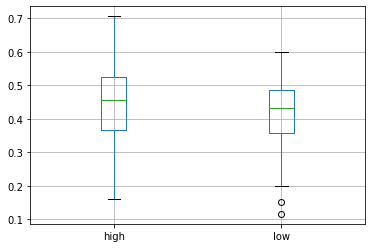

In [264]:
result_compare.boxplot(whis=1.5) #columns列索引，values所有数值
plt.show()